<a href="https://colab.research.google.com/github/CNU-Jiho-Jeong/Data-analysis-lecture/blob/main/%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 회귀분석

- 독립변수 x와 종속변수 y의 관계를 모델링하는 기법
- 둘 사이의 관계를 수치로 평가
- data로 부터 원하는 값을 예측하고 싶을때 주로 사용



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data_raw=pd.read_csv("/content/학생건강검사 결과분석 rawdata_서울_2015_20200114.csv", encoding='cp949')
data_raw.head()

,ID,최종가중치,학교ID,도시규모,도시규모별분석용,학년도,광역시도,시도별,학교급별,학교명,...,키,몸무게,혈당식전mgdl,총콜레스테롤mgdl,ASTUL,ALTUL,혈색소gdl,간염검사,수축기,이완기
0,Aa011남10101,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,125.8,27.3,NaN,NaN,NaN,NaN,NaN,NaN,77.0,58.0
1,Aa011남10102,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,124.3,25.4,NaN,NaN,NaN,NaN,NaN,NaN,83.0,51.0
2,Aa011남10103,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,119.2,23.5,NaN,NaN,NaN,NaN,NaN,NaN,103.0,65.0
3,Aa011남10104,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,115.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,92.0,66.0
4,Aa011남10105,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,120.0,33.5,NaN,NaN,NaN,NaN,NaN,NaN,102.0,59.0


In [ ]:
# 데이터 탐색

data_raw.shape

(9686, 25)

In [ ]:
data_raw.describe()

,최종가중치,학년도,학교급별,학년,반,키,몸무게,혈당식전mgdl,총콜레스테롤mgdl,ASTUL,ALTUL,혈색소gdl,수축기,이완기
count,9686.000000,9686.0,9686.000000,9686.000000,9686.000000,9686.000000,9682.000000,338.00000,339.000000,336.000000,337.000000,578.000000,3025.000000,3025.000000
mean,104.894487,2015.0,1.995767,2.567933,2.659096,154.564444,50.207591,92.14497,173.516519,27.824405,30.311573,12.976990,104.830083,62.987438
std,39.376988,0.0,0.856499,1.414243,2.601067,16.968590,17.075953,10.49571,32.567571,19.327395,32.191960,1.092454,12.661348,7.948402
min,23.325794,2015.0,1.000000,1.000000,1.000000,107.700000,15.900000,65.00000,102.000000,11.000000,8.000000,9.000000,65.000000,23.000000
25%,76.966829,2015.0,1.000000,1.000000,1.000000,142.000000,37.200000,85.00000,148.500000,19.000000,14.000000,12.400000,98.000000,60.000000
50%,99.963287,2015.0,2.000000,2.000000,1.000000,158.700000,50.700000,91.00000,170.000000,24.000000,20.000000,13.200000,105.000000,62.000000
75%,133.231158,2015.0,3.000000,3.000000,3.000000,167.200000,60.600000,99.00000,191.000000,30.000000,32.000000,13.675000,112.000000,69.000000
max,248.300844,2015.0,3.000000,6.000000,15.000000,194.200000,130.700000,132.00000,300.000000,186.000000,272.000000,15.700000,180.000000,98.000000


In [ ]:
# 키와 몸무게 데이터만 저장

data = data_raw[["키", "몸무게"]] 
data.head()


,키,몸무게
0,125.8,27.3
1,124.3,25.4
2,119.2,23.5
3,115.0,20.0
4,120.0,33.5


In [ ]:
# 결측치 확인!
data.isnull().sum()

키      0
몸무게    4
dtype: int64

In [ ]:
# 결측치 제거
data.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
data.isnull().sum()

키      0
몸무게    0
dtype: int64

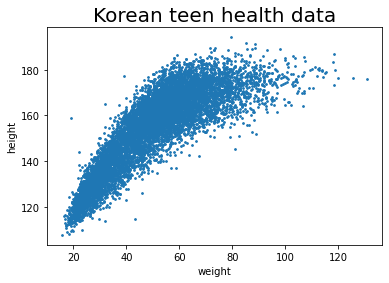

In [ ]:
# 키와 몸무게를 각각 따로 저장한 후 scatter 시키기.

height = data['키']
weight = data['몸무게']

plt.scatter(weight, height, s=3)
plt.title("Korean teen health data", fontsize=20)
plt.xlabel("weight")
plt.ylabel("height")
plt.show()

In [ ]:
# 임의의 n개의 데이터를 이용하고 싶다 -> random
# np.random.randint(시작, 끝, 몇 개 뽑을거니?)

np.random.randint(1, 10, 5)

array([4, 3, 4, 9, 6])

In [ ]:
# 난수를 고정하기.

np.random.seed(16)
np.random.randint(1,10,5)

array([6, 2, 5, 5, 1])

In [ ]:
# 임의의 데이터 100개를 뽑을 index 생성

select = np.random.randint(1, data.shape[0], 100) # 숫자로 적는 것 보다, data.shape[0]으로 쓰는 것이 좋다. 데이터 갯수가 변해도 사용 가능하기 때문이다.
select

array([7057, 3449, 5435, 3951, 4499, 5749, 6305, 7968, 3659, 1743, 4702,
       4302,  797, 5235, 3516,  749, 4105, 3043, 2194, 2345, 4277, 8320,
        365,  527,  439, 7407, 5999, 7465, 6573, 6929, 6583, 8982, 1685,
       8890,  813,  147, 5465, 6252, 6776, 1474, 1788, 4012,  263, 2194,
        781, 3458, 8388, 3421, 4594,   24,  967, 1466, 2327, 4415, 9500,
       1492, 3589, 6787, 5497, 1066, 5360, 7149, 4188, 6388, 4971,  876,
       4247, 5313, 6138, 8829, 9303, 2670, 8163, 5764, 9327, 8614, 3986,
       5859, 9045, 6108, 7307, 7642, 4709, 8336, 6854,  412, 6330, 6261,
       7218, 4460,  563, 5369, 7992, 2129, 3783, 9606, 6615,   64, 2171,
       3470])

In [ ]:
# select에 입력된 index를 기준으로 데이터 추출

height_100 = data["키"][select]
weight_100 = data["몸무게"][select]


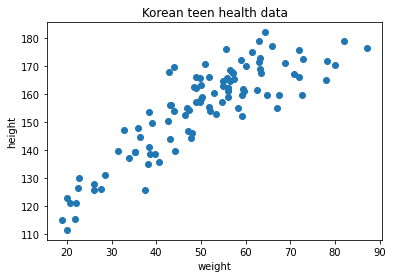

In [ ]:
plt.scatter(weight_100, height_100)
plt.title("Korean teen health data")
plt.xlabel("weight")
plt.ylabel("height")
plt.show()

In [ ]:
def Line(a,b,x):
  y = a*x+b
  return(y)




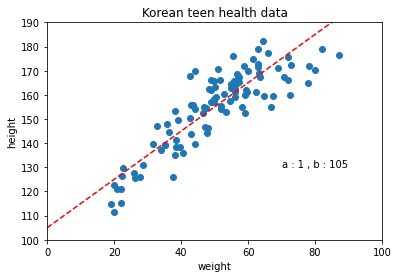

In [ ]:
a = 1
b = 105

x = np.linspace(0,100,10001)
y = Line(a, b, x)

plt.scatter(weight_100, height_100)
plt.plot(x, y, "r--")
plt.text(70,130, "a : {} , b : {}".format(a,b))
plt.title("Korean teen health data")
plt.xlabel("weight")
plt.ylabel("height")

plt.xlim([0,100])
plt.ylim([100,190])
plt.show()

## 손실함수
- 손실함수를 목적함수라고도 한다. 
- How? -> 일일히 때려넣는다..(**그리드 서치**)

In [ ]:
# Error를 구하기 위한 Dataframe을 df에 생성
# Dataframe끼리 합칠때는 concat을 사용

df = pd.concat([weight_100, height_100], axis = 1)
df

,몸무게,키
7057,65.9,177.2
3449,39.1,149.5
5435,50.3,159.1
3951,56.0,159.1
4499,54.6,157.3
...,...,...
9606,70.8,167.2
6615,56.5,164.6
64,26.0,127.7
2171,28.6,131.1


In [ ]:
# index reset
df.reset_index(drop = True, inplace = True)
df

,몸무게,키
0,65.9,177.2
1,39.1,149.5
2,50.3,159.1
3,56.0,159.1
4,54.6,157.3
...,...,...
95,70.8,167.2
96,56.5,164.6
97,26.0,127.7
98,28.6,131.1


In [ ]:
# lionear function로 예측한 예상 키를 df에 첨가

a = 1
b = 105

df["예상 키"] = Line(a, b, df["몸무게"])
df

,몸무게,키,예상 키
0,65.9,177.2,170.9
1,39.1,149.5,144.1
2,50.3,159.1,155.3
3,56.0,159.1,161.0
4,54.6,157.3,159.6
...,...,...,...
95,70.8,167.2,175.8
96,56.5,164.6,161.5
97,26.0,127.7,131.0
98,28.6,131.1,133.6


In [ ]:
# 예상 키와 실제 키와의 차이를 계산하기

diff = df['키'] - df["예상 키"]
diff

0      6.3
1      5.4
2      3.8
3     -1.9
4     -2.3
      ... 
95    -8.6
96     3.1
97    -3.3
98    -2.5
99   -11.7
Length: 100, dtype: float64

In [ ]:
# RMSE 구하기

np.sqrt(sum(diff**2)/len(diff))

8.254889460192665

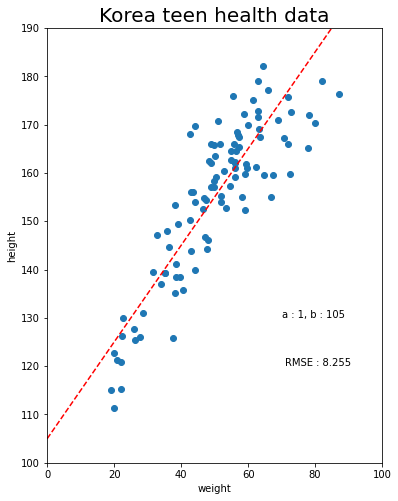

In [ ]:
# a와 b에 따른 RMSE 변화를 시각적으로 살펴보자

a, b = 1, 105
plt.figure(figsize=(6,8))
x = np.linspace(0,100,1001)
y = Line(a,b,x)

df = pd.concat([weight_100, height_100], axis = 1)
df["예상 키"] = Line(a, b, df["몸무게"])
diff = df["키"] - df["예상 키"]

RMSE = np.sqrt(sum(diff**2)/len(diff))

# 시각화

plt.scatter(weight_100, height_100)
plt.plot(x, y, "r--")

plt.title("Korea teen health data", fontsize = 20)
plt.xlabel("weight")
plt.ylabel("height")
plt.text(70,130, "a : {}, b : {}".format(a,b))
plt.text(71, 120, "RMSE : {:1.3f}".format(RMSE))

plt.xlim([0,100])
plt.ylim([100,190])
plt.show()



In [ ]:
# 가능한 a,b의 쌍을 모두 입력해보고 최소 RMSE를 뽑아보자

data_rmse = pd.DataFrame([a,b,RMSE]).T
data_rmse.columns = ["a", "b", "RMSE"]
data_rmse

,a,b,RMSE
0,1.0,105.0,8.254889


In [ ]:
a_range = np.linspace(0.9, 1.1, 3)
b_range = np.linspace(90,110,3)

a_list = []
b_list = []
rmse_list = []

df = pd.concat([weight_100, height_100], axis = 1)

for a in a_range:
  for b in b_range:
    df["예상 키"] = Line(a, b, df["몸무게"])
    diff = df["키"] - df["예상 키"]
    RMSE = np.sqrt(sum(diff**2)/len(diff))

    a_list.append(a)
    b_list.append(b)
    rmse_list.append(RMSE)

data_rmse = pd.DataFrame([a_list, b_list, rmse_list]).T
data_rmse.columns = ["a", "b", "RMSE"]
data_rmse


,a,b,RMSE
0,0.9,90.0,21.211623
1,0.9,100.0,12.594719
2,0.9,110.0,8.204935
3,1.0,90.0,16.718947
4,1.0,100.0,9.412927
5,1.0,110.0,9.883481
6,1.1,90.0,12.811340
7,1.1,100.0,8.578837
8,1.1,110.0,13.530057


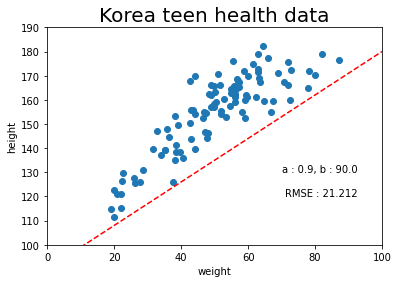

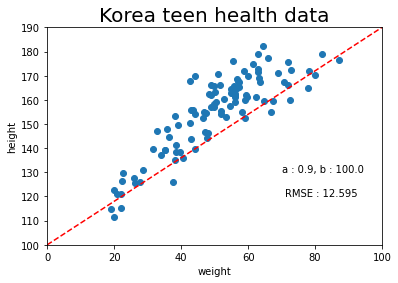

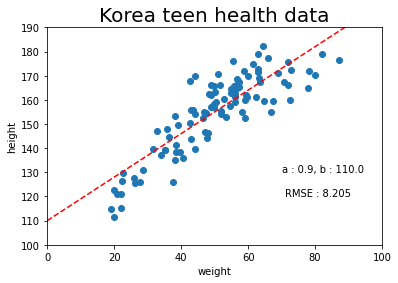

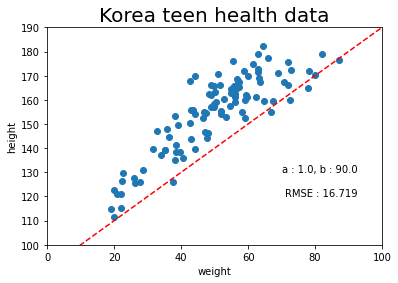

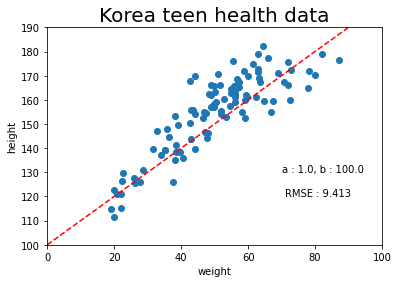

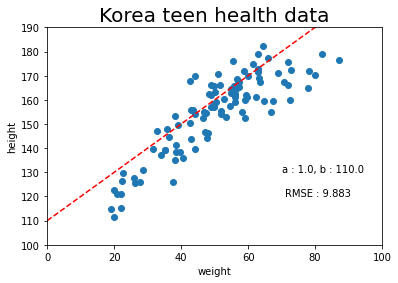

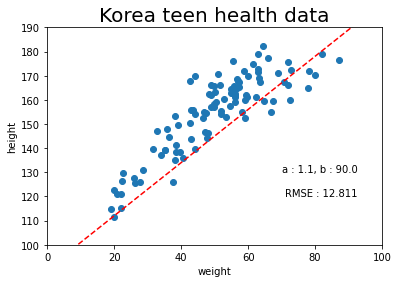

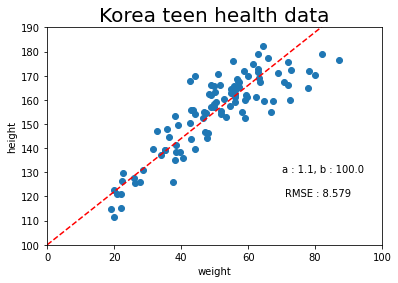

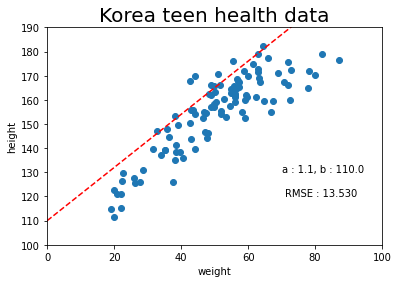

In [ ]:
x = np.linspace(0,100,1001)


for k in range(data_rmse.shape[0]):
  a,b,RMSE = data_rmse.iloc[k,:]

  y = Line(a,b,x)

  plt.scatter(weight_100, height_100)
  plt.plot(x, y, "r--")

  plt.title("Korea teen health data", fontsize = 20)
  plt.xlabel("weight")
  plt.ylabel("height")
  plt.text(70,130, "a : {}, b : {}".format(a,b))
  plt.text(71, 120, "RMSE : {:1.3f}".format(RMSE))

  plt.xlim([0,100])
  plt.ylim([100,190])
  plt.show()
  print("\n")



In [ ]:
# 조금 더 잘게 쪼개보자


a_range = np.linspace(0.9, 1.1, 41)
b_range = np.linspace(90,110,41)

a_list = []
b_list = []
rmse_list = []

df = pd.concat([weight_100, height_100], axis = 1)

for a in a_range:
  for b in b_range:
    df["예상 키"] = Line(a, b, df["몸무게"])
    diff = df["키"] - df["예상 키"]
    RMSE = np.sqrt(sum(diff**2)/len(diff))

    a_list.append(a)
    b_list.append(b)
    rmse_list.append(RMSE)

data_rmse = pd.DataFrame([a_list, b_list, rmse_list]).T
data_rmse.columns = ["a", "b", "RMSE"]
data_rmse

,a,b,RMSE
0,0.9,90.0,21.211623
1,0.9,90.5,20.751329
2,0.9,91.0,20.292914
3,0.9,91.5,19.836508
4,0.9,92.0,19.382254
...,...,...,...
1676,1.1,108.0,12.048620
1677,1.1,108.5,12.405343
1678,1.1,109.0,12.771681
1679,1.1,109.5,13.146830


In [ ]:
# RMSE의 최소가 되는 a,b 는?

data_rmse.min()

a        0.900000
b       90.000000
RMSE     8.178685
dtype: float64

In [ ]:
# 최소가 되는 인덱스 찾기

data_rmse["RMSE"] == data_rmse.min()[2]
data_rmse[data_rmse["RMSE"] == data_rmse.min()[2]]

,a,b,RMSE
282,0.93,108.0,8.178685


In [ ]:
data_min = data_rmse[data_rmse["RMSE"] == data_rmse.min()[2]]
data_min = np.array(data_min)[0]

print("RMSE가 최소가 되는 a : {}, b : {}".format(data_min[0], data_min[1]))

RMSE가 최소가 되는 a : 0.93, b : 108.0


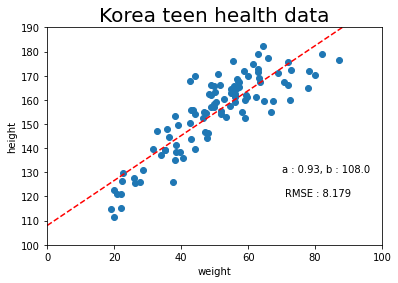

In [ ]:
a = data_min[0]
b = data_min[1]

x = np.linspace(0,100,1001)
y = Line(a,b,x)


df["예상 키"] = Line(a, b, df["몸무게"])
diff = df["키"] - df["예상 키"]
RMSE = np.sqrt(sum(diff**2)/len(diff))

plt.scatter(weight_100, height_100)
plt.plot(x, y, "r--")

plt.title("Korea teen health data", fontsize = 20)
plt.xlabel("weight")
plt.ylabel("height")
plt.text(70,130, "a : {}, b : {}".format(a,b))
plt.text(71, 120, "RMSE : {:1.3f}".format(RMSE))

plt.xlim([0,100])
plt.ylim([100,190])
plt.show()



1. 선형회귀란 데이터를 가장 잘 설명해줄 수 있는 선형함수를 찾는 것.
2. 데이터를 가장 잘 설명해준다 = 정의된 loss function을 최소화

---


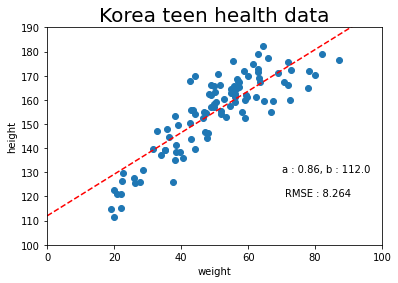

In [ ]:
a = 0.86
b = 112.0

x = np.linspace(0,100,1001)
y = Line(a,b,x)


df["예상 키"] = Line(a, b, df["몸무게"])
diff = df["키"] - df["예상 키"]
RMSE = np.sqrt(sum(diff**2)/len(diff))

plt.scatter(weight_100, height_100)
plt.plot(x, y, "r--")

plt.title("Korea teen health data", fontsize = 20)
plt.xlabel("weight")
plt.ylabel("height")
plt.text(70,130, "a : {}, b : {}".format(a,b))
plt.text(71, 120, "RMSE : {:1.3f}".format(RMSE))

plt.xlim([0,100])
plt.ylim([100,190])
plt.show()


---

## 다양한 손실 함수

1. P-norm
2. Orthogonal Distance
3. log-cosh
4. Huber function


In [ ]:
# loss function 만들기

# P-norm 

def p_norm(diff, p):
  return(sum(abs(diff)**p) ** (1/p))


In [ ]:
diff = np.array([3, 0, -2, 5, 3])
p_norm(diff,4)

5.323274803221182

In [ ]:
# OD

def OD(diff,a):
  return sum(abs(diff) / np.sqrt(a**2 + 1))

In [ ]:
OD(diff, 4)

3.1529631254723287

In [ ]:
# log_cosh

def log_cosh(diff):
  return sum(np.log(np.cosh(diff))) # log와 cosh는 np에서 꺼내 쓸 수 있는 듯. 그래서 np.log / np.cosh 이렇게 쓰는 듯.  


In [ ]:
log_cosh(diff)

10.250557974852706

In [ ]:
# Huber

def Huber(diff, delta):

  result = 0

  for value in diff:
    if abs(value)<=delta:
      result += 0.5 * (value**2)
    else:
      result += delta*(abs(value)-0.5*delta)
  

  return(result)



In [ ]:
Huber(diff, 10)

23.5

In [ ]:
a_list = []
b_list = []
loss_list = []

df = pd.concat([weight_100, height_100], axis = 1)

for a in a_range:
  for b in b_range:
    df["예상 키"] = Line(a, b, df["몸무게"])
    diff = df["키"] - df["예상 키"]
    loss = p_norm(diff, 10)

    a_list.append(a)
    b_list.append(b)
    loss_list.append(loss)

data_loss = pd.DataFrame([a_list, b_list, loss_list]).T
data_loss.columns = ["a", "b", "loss"]
data_loss

data_min = data_loss[data_loss["loss"] == data_loss.min()[2]]

a = float(data_min["a"])
b = float(data_min["b"])
loss = float(data_min["loss"])



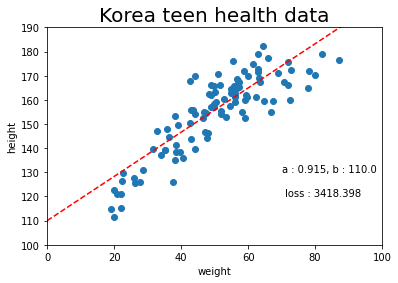

In [ ]:
x = np.linspace(0,100,1001)
y = Line(a,b,x)


df["예상 키"] = Line(a, b, df["몸무게"])
diff = df["키"] - df["예상 키"]
# loss = p_norm(diff,10)
# loss = OD(diff, a)
# loss = log_cosh(diff)
loss = Huber(diff, 20)

plt.scatter(weight_100, height_100)
plt.plot(x, y, "r--")

plt.title("Korea teen health data", fontsize = 20)
plt.xlabel("weight")
plt.ylabel("height")
plt.text(70,130, "a : {}, b : {}".format(a,b))
plt.text(71, 120, "loss : {:1.3f}".format(loss))

plt.xlim([0,100])
plt.ylim([100,190])
plt.show()

## 다양한 loss function

- loss 값들이 지들 맘대로라서 평가하기가 힘들다.
- loss 값을 최소화하는 방법을 수학적으로 살펴본다면?
 
 -> loss = f(a,b)
 

In [ ]:
# 곡면 그리기
# (x,y) 점들의 집합이 필요

a_test = range(1,4)
b_test = range(1,4)

# MeshGrid 만들기

X, Y = np.meshgrid(a_test, b_test)

for x in range(len(a_test)):
  for y in range(len(b_test)):
    print("(x,y) = ({}, {})".format(X[x,y], Y[x,y]))



(x,y) = (1, 1)
(x,y) = (2, 1)
(x,y) = (3, 1)
(x,y) = (1, 2)
(x,y) = (2, 2)
(x,y) = (3, 2)
(x,y) = (1, 3)
(x,y) = (2, 3)
(x,y) = (3, 3)


In [ ]:
# data의 loss는 2차원 데이터가 아니다

data_loss["loss"]

0       45.453584
1       44.811726
2       44.171997
3       43.534417
4       42.899002
          ...    
1676    32.655299
1677    33.271556
1678    33.889360
1679    34.508666
1680    35.129448
Name: loss, Length: 1681, dtype: float64

In [ ]:
# 1차원 벡터를 2차원 array로 바꾸는 방법

test = np.arange(9)
test.reshape(3,3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [ ]:
loss_mat = np.array(loss_list).reshape(len(a_range), len(b_range))
loss_mat

array([[45.45358444, 44.81172572, 44.17199729, ..., 22.8532383 ,
        22.46283731, 22.16941803],
       [45.13849268, 44.49811347, 43.85988313, ..., 22.66500237,
        22.31466349, 22.07581623],
       [44.82486167, 44.18597478, 43.54925494, ..., 22.49512145,
        22.19208773, 22.01489647],
       ...,
       [34.48339451, 33.90032986, 33.31951293, ..., 32.98137248,
        33.6002859 , 34.22073567],
       [34.22008949, 33.63842961, 33.05900785, ..., 33.43472712,
        34.05384037, 34.67445749],
       [33.95786829, 33.37759973, 32.79956314, ..., 33.88936027,
        34.50866591, 35.12944779]])

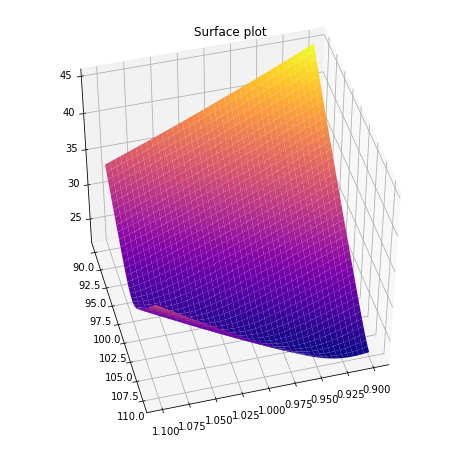

In [ ]:
# 3차원 곡면 만들기

fig = plt.figure(figsize = (8,8))

ax3d = plt.axes(projection = '3d')

X, Y = np.meshgrid(a_range, b_range)
Z = np.array(loss_mat).T
ax3d.plot_surface(X,Y,Z, cmap = "plasma")

ax3d.set_title("Surface plot")
ax3d.view_init(45,75)

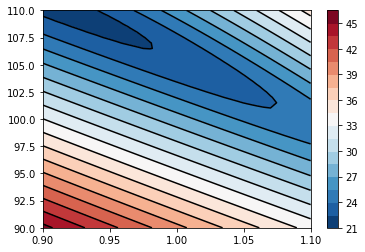

In [ ]:
# 등고선 그리기

X, Y = np.meshgrid(a_range, b_range)
Z = np.array(loss_mat).T

plt.contour(X,Y,Z,levels = 20, colors = 'k') # contour: 등고선 그려주는 애
cntr = plt.contourf(X,Y,Z, levels = 20, cmap = "RdBu_r")
plt.colorbar(cntr) # 우측의 colorbar를 말함. 
plt.show()

In [ ]:
# 일반적인 Linear Regression을 하는 함수 만들기 (Grid search method를 이용하는)

# input : X, Y, a_range, b_range, loss_function, loss_hyperparameter

# 1. loss_function을 이용하여 x,y 값에 따른 loss를 계산
# 2. 각 x, y, loss를 저장할 수 있는 DataFrame을 만들기
# 3. loss가 가장 작게 나오는 parameter와 loss, loss_list를 출력한다.

def f(x,a,b):
  return a*x +b

def LR(X,Y,a_range, b_range, loss_function, loss_hyperparameter):

  a_list = []
  b_list = []
  loss_list = []

  for a in a_range:
    for b in b_range:
      diff = Y - f(X, a, b)

      if loss_function == 'p_norm':
        loss = p_norm(diff, loss_hyperparameter)
      elif loss_function == "OD":
        loss = OD(diff, a)
      elif loss_function == "log_cosh":
        loss = log_cosh(diff)

      elif loss_function == "huber":
        loss = huber(diff, loss_hyperparameter)
      
      a_list.append(a)
      b_list.append(b)
      loss_list.append(loss)

  df_loss = pd.DataFrame([a_list, b_list, loss_list]).T
  df_loss.columns = ["a", "b", "loss"]

  df_min = df_loss[df_loss["loss"] == df_loss.min()[2]]

  return float(df_min["a"]), float(df_min["b"]), float(df_min["loss"]), loss_list



In [ ]:
np.random.seed(12)
n = 800
select = np.random.randint(1, data.shape[0], n) 
height_data = data["키"][select]
weight_data = data["몸무게"][select]

a_range = np.linspace(0.7, 1.3, 31)
b_range = np.linspace(80, 120, 41)

loss_function = 'log_cosh'
loss_hyperparameter = 2

a, b, loss, loss_list = LR(X = weight_data, Y = height_data, a_range = a_range, b_range = b_range, loss_function = loss_function, loss_hyperparameter = loss_hyperparameter)


In [ ]:
a

0.9199999999999999

In [ ]:
b

109.0

In [ ]:
loss

5214.976810624721

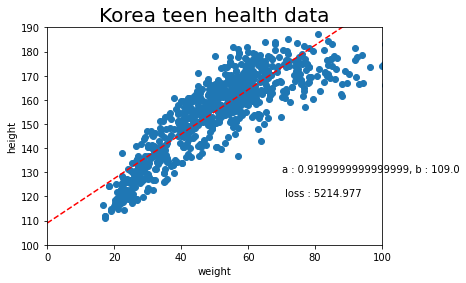

In [ ]:
x = np.linspace(0,100,1001)
y = Line(a,b,x)


plt.scatter(weight_data, height_data)
plt.plot(x, y, "r--")

plt.title("Korea teen health data", fontsize = 20)
plt.xlabel("weight")
plt.ylabel("height")
plt.text(70,130, "a : {}, b : {}".format(a,b))
plt.text(71, 120, "loss : {:1.3f}".format(loss))

plt.xlim([0,100])
plt.ylim([100,190])
plt.show()

### log regression이 많이 활용됨

1. 모델을 만들면 모델이 잘 작동되는지 확인해야함
2. 모델의 종류에 따라 성능도 많이 달라짐